In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("test.csv")
data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
data.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


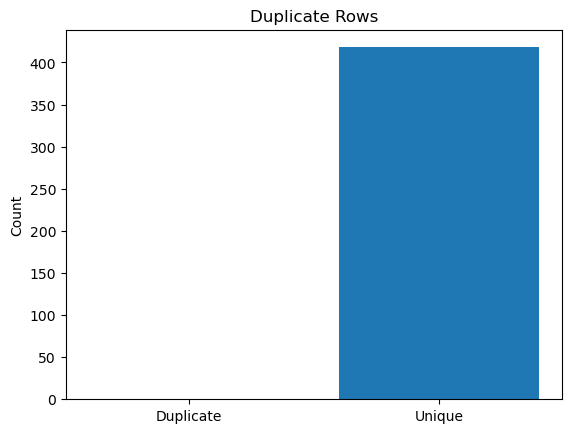

In [5]:
duplicate_counts = data.duplicated().sum()
unique_counts = data.drop_duplicates().shape[0]
plt.bar(['Duplicate', 'Unique'], [duplicate_counts, unique_counts])
plt.ylabel('Count')
plt.title('Duplicate Rows')
plt.show()


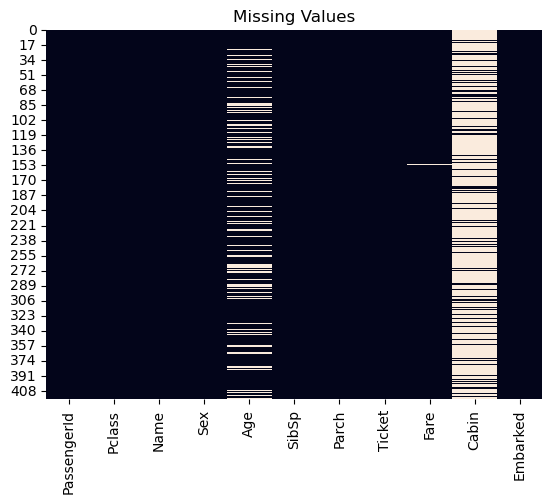

In [8]:
sns.heatmap(data.isnull(),cbar=False)
plt.title('Missing Values')
plt.show()

In [9]:
data = data.drop("Cabin",axis=1)
data = data.drop("Ticket",axis=1)
data = data.drop("Name",axis=1)

In [10]:
data.fillna(data['Age'].mean(),inplace=True)

Total Number of null values in PassengerId column is -> 0
Total Number of null values in Pclass column is -> 0
Total Number of null values in Sex column is -> 0
Total Number of null values in Age column is -> 0
Total Number of null values in SibSp column is -> 0
Total Number of null values in Parch column is -> 0
Total Number of null values in Fare column is -> 0
Total Number of null values in Embarked column is -> 0


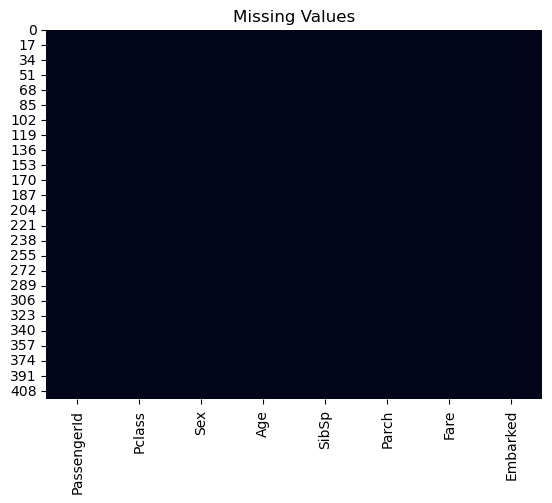

In [13]:
col=data.columns
for co in col:
    null_val = data[co].isnull().sum()
    print(f"Total Number of null values in {co} column is -> {null_val}")

sns.heatmap(data.isnull(),cbar=False)
plt.title('Missing Values')
plt.show()


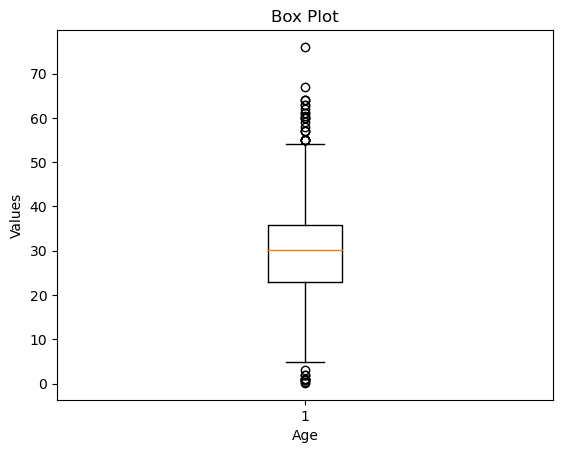

In [14]:
plt.boxplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()


In [15]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
print(outliers)
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

     PassengerId  Pclass     Sex    Age  SibSp  Parch       Fare Embarked
2            894       2    male  62.00      0      0    9.68750        Q
13           905       2    male  63.00      1      0   26.00000        S
20           912       1    male  55.00      1      0   59.40000        C
48           940       1  female  60.00      0      0   76.29170        C
69           961       1  female  60.00      1      4  263.00000        S
77           969       1  female  55.00      2      0   25.70000        S
81           973       1    male  67.00      1      0  221.77920        S
89           981       2    male   2.00      1      1   23.00000        S
96           988       1  female  76.00      1      0   78.85000        S
114         1006       1  female  63.00      1      0  221.77920        S
117         1009       3  female   1.00      1      1   16.70000        S
142         1034       1    male  61.00      1      3  262.37500        C
152         1044       3    male  60.5

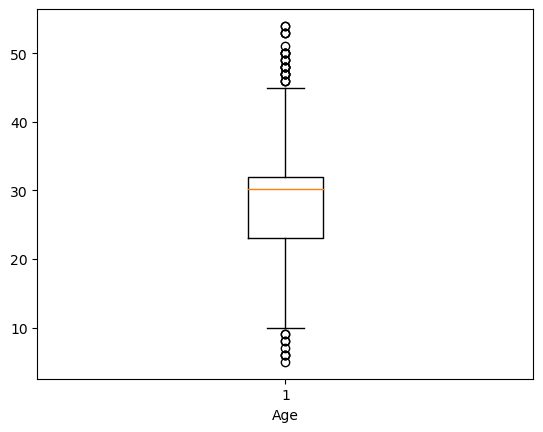

In [16]:
plt.boxplot(data['Age'])
plt.xlabel('Age')
plt.show()

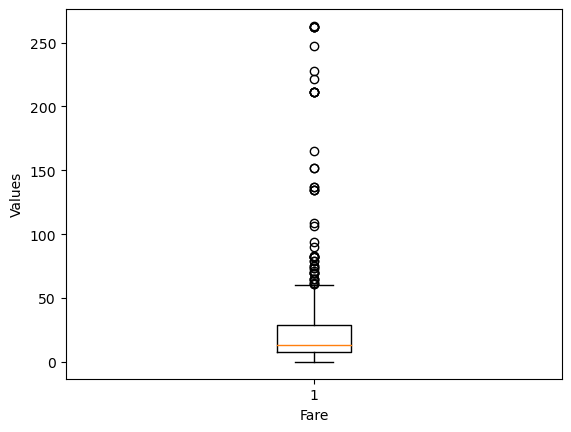

In [17]:
plt.boxplot(data['Fare'])
plt.xlabel('Fare')
plt.ylabel('Values')
plt.show()


In [18]:
q1 = data['Fare'].quantile(0.25)
q3 = data['Fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data[(data['Fare'] < lower_bound) | (data['Fare'] > upper_bound)]
print(outliers)
data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]


     PassengerId  Pclass     Sex       Age  SibSp  Parch      Fare Embarked
12           904       1  female  23.00000      1      0   82.2667        S
14           906       1  female  47.00000      1      0   61.1750        S
23           915       1    male  21.00000      0      1   61.3792        C
24           916       1  female  48.00000      1      3  262.3750        C
26           918       1  female  22.00000      0      1   61.9792        C
53           945       1  female  28.00000      3      2  263.0000        S
59           951       1  female  36.00000      0      0  262.3750        C
64           956       1    male  13.00000      2      2  262.3750        C
74           966       1  female  35.00000      0      0  211.5000        C
75           967       1    male  32.50000      0      0  211.5000        C
118         1010       1    male  36.00000      0      0   75.2417        C
141         1033       1  female  33.00000      0      0  151.5500        S
150         

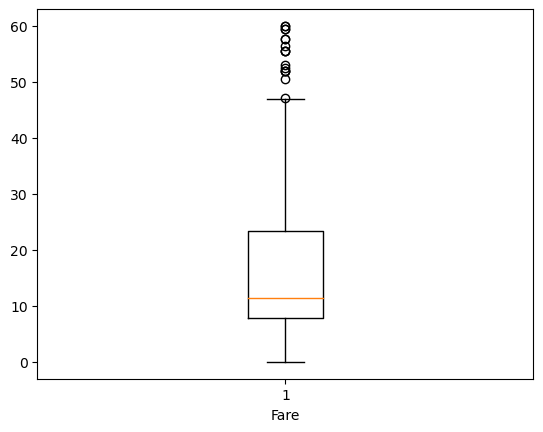

In [19]:
plt.boxplot(data['Fare'])
plt.xlabel('Fare')
plt.show()

In [20]:
min_val = data['Fare'].min()
max_val = data['Fare'].max()
data['Fare'] = (data['Fare'] - min_val) / (max_val - min_val)
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,0.130487,Q
1,893,3,female,47.0,1,0,0.116667,S
3,895,3,male,27.0,0,0,0.144375,S
4,896,3,female,22.0,1,1,0.204792,S
5,897,3,male,14.0,0,0,0.153750,S


In [21]:
min_val = data['Age'].min()
max_val = data['Age'].max()
data['Age'] = (data['Age'] - min_val) / (max_val - min_val)
data.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,0.602041,0,0,0.130487,Q
1,893,3,female,0.857143,1,0,0.116667,S
3,895,3,male,0.448980,0,0,0.144375,S
4,896,3,female,0.346939,1,1,0.204792,S
5,897,3,male,0.183673,0,0,0.153750,S


In [22]:
min_val = data['Pclass'].min()
max_val = data['Pclass'].max()
data['Pclass'] = (data['Pclass'] - min_val) / (max_val - min_val)
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,1.0,male,0.602041,0,0,0.130487,Q
1,893,1.0,female,0.857143,1,0,0.116667,S
3,895,1.0,male,0.448980,0,0,0.144375,S
4,896,1.0,female,0.346939,1,1,0.204792,S
5,897,1.0,male,0.183673,0,0,0.153750,S


In [23]:
min_val = data['SibSp'].min()
max_val = data['SibSp'].max()
data['SibSp'] = (data['SibSp'] - min_val) / (max_val - min_val)
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,1.0,male,0.602041,0.0,0,0.130487,Q
1,893,1.0,female,0.857143,0.2,0,0.116667,S
3,895,1.0,male,0.448980,0.0,0,0.144375,S
4,896,1.0,female,0.346939,0.2,1,0.204792,S
5,897,1.0,male,0.183673,0.0,0,0.153750,S


In [24]:
min_val = data['Parch'].min()
max_val = data['Parch'].max()
data['Parch'] = (data['Parch'] - min_val) / (max_val - min_val)
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,1.0,male,0.602041,0.0,0.000000,0.130487,Q
1,893,1.0,female,0.857143,0.2,0.000000,0.116667,S
3,895,1.0,male,0.448980,0.0,0.000000,0.144375,S
4,896,1.0,female,0.346939,0.2,0.166667,0.204792,S
5,897,1.0,male,0.183673,0.0,0.000000,0.153750,S


In [25]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,1.0,1,0.602041,0.0,0.000000,0.130487,Q
1,893,1.0,0,0.857143,0.2,0.000000,0.116667,S
3,895,1.0,1,0.448980,0.0,0.000000,0.144375,S
4,896,1.0,0,0.346939,0.2,0.166667,0.204792,S
5,897,1.0,1,0.183673,0.0,0.000000,0.153750,S


In [26]:
label_encoder = LabelEncoder()
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,1.0,1,0.602041,0.0,0.000000,0.130487,1
1,893,1.0,0,0.857143,0.2,0.000000,0.116667,2
3,895,1.0,1,0.448980,0.0,0.000000,0.144375,2
4,896,1.0,0,0.346939,0.2,0.166667,0.204792,2
5,897,1.0,1,0.183673,0.0,0.000000,0.153750,2


In [27]:
data.to_csv("Final_dataset.csv")